In [18]:
#import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Question 1b: Value Pricing (10 points)

You are in charge of pricing a new digital news media. The variable cost of a new visitor is 0
and the fixed cost of producing material is $120,000 each month. You find the potential
market of 200,000 potential buyers in the following 10 market segments. What price would
you charge? What are your expected revenue and profit?
Segment % of population Willingness to per (in dollars per month)
1 30% $1
2 20% $2
3 15% $3
4 10% $1
5 5% $5
6 5% $0
7 5% $6
8 5% $9
9 3% $30
10 2% $20

In [12]:
segments = [
    {"percentage": 30, "willingness_to_pay": 1},
    {"percentage": 20, "willingness_to_pay": 2},
    {"percentage": 15, "willingness_to_pay": 3},
    {"percentage": 10, "willingness_to_pay": 1},
    {"percentage": 5, "willingness_to_pay": 5},
    {"percentage": 5, "willingness_to_pay": 0},
    {"percentage": 5, "willingness_to_pay": 6},
    {"percentage": 5, "willingness_to_pay": 9},
    {"percentage": 3, "willingness_to_pay": 30},
    {"percentage": 2, "willingness_to_pay": 20},
]

total_market_size = 200000
fixed_cost = 120000

for segment in segments:
    segment["buyers"] = (segment["percentage"] / 100) * total_market_size

price_points = sorted({segment["willingness_to_pay"] for segment in segments})

def calculate_revenue_and_profit(price_point):
    total_buyers = sum(segment["buyers"] for segment in segments if segment["willingness_to_pay"] >= price_point)
    revenue = total_buyers * price_point
    profit = revenue - fixed_cost
    return revenue, profit

optimal_price = 0
max_profit = float('-inf')
optimal_revenue = 0

for price_point in price_points:
    revenue, profit = calculate_revenue_and_profit(price_point)
    if profit > max_profit:
        max_profit = profit
        optimal_price = price_point
        optimal_revenue = revenue

print(f"Optimal Price: ${optimal_price}")
print(f"Expected Revenue: ${optimal_revenue}")
print(f"Expected Profit: ${max_profit}")

Optimal Price: $2
Expected Revenue: $220000.0
Expected Profit: $100000.0


Question 2: EVC (20 points)

‘CrispyWater’, a leading Warter purifier brand, is planning to release a commercial filter model: Purity 2.0 with two major benefits: (i) The filter needs to be changed every 10,000 liters, approximately once a year, and (ii)The rate of damage to holding tank the is reduced.
The current filter Purity must change every 5,000 liters or approximately after six months. Purity costs $300. The labor cost to change this is $50. The labor cost required to change the new filter is the same.
The new filter also reduces the change for damage in the filter membrane from 0.7% to 0.5% a year (note this is annual and not per filter replacement). When the tank is damaged, it needs to be replaced, which costs $2,500.
a) What is the maximum EVC-based price for the new filter Purity2.0 for a business? State any assumption you make.
b) You are asked to survey to access the demand curve for Purity 2.0. Design a 3-question survey (if you ask more than 3 questions, only the first 3 questions will be graded) you would ask commercial procurement managers.

In [13]:
# parameters
current_filter_cost = 300
labor_cost = 50
current_filter_lifetime = 5000 
new_filter_lifetime = 10000 
annual_water_usage = 10000 
current_damage_rate = 0.007
new_damage_rate = 0.005
tank_replacement_cost = 2500

# annual costs for the current filter
current_replacements_per_year = annual_water_usage / current_filter_lifetime
current_annual_filter_cost = current_replacements_per_year * (current_filter_cost + labor_cost)
current_annual_damage_cost = current_damage_rate * tank_replacement_cost

# annual costs for the new filter
new_replacements_per_year = annual_water_usage / new_filter_lifetime
new_annual_filter_cost = new_replacements_per_year * labor_cost
new_annual_damage_cost = new_damage_rate * tank_replacement_cost

# total annual cost savings
total_annual_savings = (current_annual_filter_cost + current_annual_damage_cost) - (new_annual_filter_cost + new_annual_damage_cost)

# maximum EVC-based price for the new filter
maximum_evc_based_price = total_annual_savings / new_replacements_per_year

# results
print(f"Current Annual Filter Cost: ${current_annual_filter_cost:.2f}")
print(f"Current Annual Damage Cost: ${current_annual_damage_cost:.2f}")
print(f"New Annual Filter Cost (excluding new filter price): ${new_annual_filter_cost:.2f}")
print(f"New Annual Damage Cost: ${new_annual_damage_cost:.2f}")
print(f"Total Annual Savings: ${total_annual_savings:.2f}")
print(f"Maximum EVC-Based Price for Purity 2.0: ${maximum_evc_based_price:.2f}")

Current Annual Filter Cost: $700.00
Current Annual Damage Cost: $17.50
New Annual Filter Cost (excluding new filter price): $50.00
New Annual Damage Cost: $12.50
Total Annual Savings: $655.00
Maximum EVC-Based Price for Purity 2.0: $655.00


Question 3: Conjoint (20 points) 

You are the product manager for GEs ultrasound line. Your first major decision is to finalize the market price range for a premium ultrasound for the US market. Your predecessor ran a Conjoint analysis with the following attributes (and levels): 
1.	Speed: 10 per hour, 20 per hour, 30 per hour 
2.	Price: $70,000, $80,000, $100,000 
3.	Uses: adult, adult and pediatric 
4.	Imaging: 2D, 3D 


100 hospital managers were recruited to participate in the conjoint experiment. The task given to the respondent was to pick one of the options for their hospital. 

•	Speed_10_per_hour = -4 
•	Speed_30_per_hour = +2 
•	Price_$70,000 = +5 
•	Price_$80,000 = +2 
•	Uses_adult = -3 
•	Imaging_3D= +1.5 


a) What are the importance weights of each attribute? What is the most important attribute?
b) Given these part-worths. Suppose a hospital chose between a 10-per-hour speed at $70,000 for 2D images for adult patients versus a 30-per-hour at $100,000 for 3D images for adult patients. Which would a representative hospital pick?
c) You are asked to consider the potential weakness of this conjoint. The business problem is considering how to price a new high-end 3D scanner that allows 30 images per hour. Provide five ways you would improve this conjoint analysis to answer the pricing question.


In [14]:
utilities = {
    "Speed": {"Speed_10_per_hour": -4, "Speed_30_per_hour": 2},
    "Price": {"Price_$70,000": 5, "Price_$80,000": 2, "Price_$100,000": 0},  
    "Uses": {"Uses_adult": -3, "Uses_adult_and_pediatric": 0},
    "Imaging": {"Imaging_2D": 0, "Imaging_3D": 1.5}
}

# range for each attribute
ranges = {attribute: max(levels.values()) - min(levels.values()) for attribute, levels in utilities.items()}

# total range
total_range = sum(ranges.values())

# importance weights
importance_weights = {attribute: (range_val / total_range) * 100 for attribute, range_val in ranges.items()}

# results
for attribute, weight in importance_weights.items():
    print(f"Importance weight for {attribute}: {weight:.2f}%")

# most important attribute
most_important_attribute = max(importance_weights, key=importance_weights.get)
print(f"The most important attribute is: {most_important_attribute}")

# total utility for Option 1 (10-per-hour, $70,000, 2D, adult)
option_1_utility = (
    utilities["Speed"]["Speed_10_per_hour"] +
    utilities["Price"]["Price_$70,000"] +
    utilities["Uses"]["Uses_adult"] +
    utilities["Imaging"]["Imaging_2D"]
)

# total utility for Option 2 (30-per-hour, $100,000, 3D, adult)
option_2_utility = (
    utilities["Speed"]["Speed_30_per_hour"] +
    utilities["Price"]["Price_$100,000"] +
    utilities["Uses"]["Uses_adult"] +
    utilities["Imaging"]["Imaging_3D"]
)

# total utilities
print(f"Total Utility for Option 1: {option_1_utility}")
print(f"Total Utility for Option 2: {option_2_utility}")


if option_1_utility > option_2_utility:
    print("The representative hospital would pick Option 1.")
else:
    print("The representative hospital would pick Option 2.")


Importance weight for Speed: 38.71%
Importance weight for Price: 32.26%
Importance weight for Uses: 19.35%
Importance weight for Imaging: 9.68%
The most important attribute is: Speed
Total Utility for Option 1: -2
Total Utility for Option 2: 0.5
The representative hospital would pick Option 2.


In [15]:
# Question 3c new posed solution 

utilities = {
    "Speed": {"Speed_10_per_hour": -4, "Speed_30_per_hour": 2},
    "Price": {"Price_$70,000": 5, "Price_$75,000": 4, "Price_$80,000": 3, "Price_$90,000": 1, "Price_$100,000": 0},
    "Uses": {"Uses_adult": -3, "Uses_adult_and_pediatric": 0},
    "Imaging": {"Imaging_2D": 0, "Imaging_3D": 1.5},
    "Resolution": {"Resolution_standard": 0, "Resolution_high": 2},  # attribute for scanner resolution
    "Maintenance_Costs": {"Maintenance_low": 1, "Maintenance_high": -1}  # attribute for maintenance costs
}

# range for each attribute
ranges = {attribute: max(levels.values()) - min(levels.values()) for attribute, levels in utilities.items()}

# total range
total_range = sum(ranges.values())

# importance weights
importance_weights = {attribute: (range_val / total_range) * 100 for attribute, range_val in ranges.items()}

# results
for attribute, weight in importance_weights.items():
    print(f"Importance weight for {attribute}: {weight:.2f}%")

# most important attribute
most_important_attribute = max(importance_weights, key=importance_weights.get)
print(f"The most important attribute is: {most_important_attribute}")

# total utility for Option 1 (10-per-hour, $70,000, 2D, adult)
option_1_utility = (
    utilities["Speed"]["Speed_10_per_hour"] +
    utilities["Price"]["Price_$70,000"] +
    utilities["Uses"]["Uses_adult"] +
    utilities["Imaging"]["Imaging_2D"]
)

# total utility for Option 2 (30-per-hour, $100,000, 3D, adult)
option_2_utility = (
    utilities["Speed"]["Speed_30_per_hour"] +
    utilities["Price"]["Price_$100,000"] +
    utilities["Uses"]["Uses_adult"] +
    utilities["Imaging"]["Imaging_3D"]
)

# total utilities
print(f"Total Utility for Option 1: {option_1_utility}")
print(f"Total Utility for Option 2: {option_2_utility}")


if option_1_utility > option_2_utility:
    print("The representative hospital would pick Option 1.")
else:
    print("The representative hospital would pick Option 2.")

Importance weight for Speed: 30.77%
Importance weight for Price: 25.64%
Importance weight for Uses: 15.38%
Importance weight for Imaging: 7.69%
Importance weight for Resolution: 10.26%
Importance weight for Maintenance_Costs: 10.26%
The most important attribute is: Speed
Total Utility for Option 1: -2
Total Utility for Option 2: 0.5
The representative hospital would pick Option 2.


Question 4: Experimentation (20 points)

You work at Dell and want to review the pricing for the new generation of the XPS 15 laptop for the US market. The previous generation was priced at $2,200 and you need to decide to price at either at $1,800, $2,200 and $2,500. Dell has run a field experiment where they set the price of $1,800 for the UCSD bookstore, $2,200 for the Ohio State University bookstore and $2,500 for the University of Florida bookstore.
Do you think this is a valid field experiment? If so, how describe how you would analyze the data? If not, describe how you would run a better field experiment? 
Please limit your answers to one page

Descriptive Statistics:
             Price  Sales
count     3.000000    3.0
mean   2166.666667   90.0
std     351.188458   30.0
min    1800.000000   60.0
25%    2000.000000   75.0
50%    2200.000000   90.0
75%    2350.000000  105.0
max    2500.000000  120.0


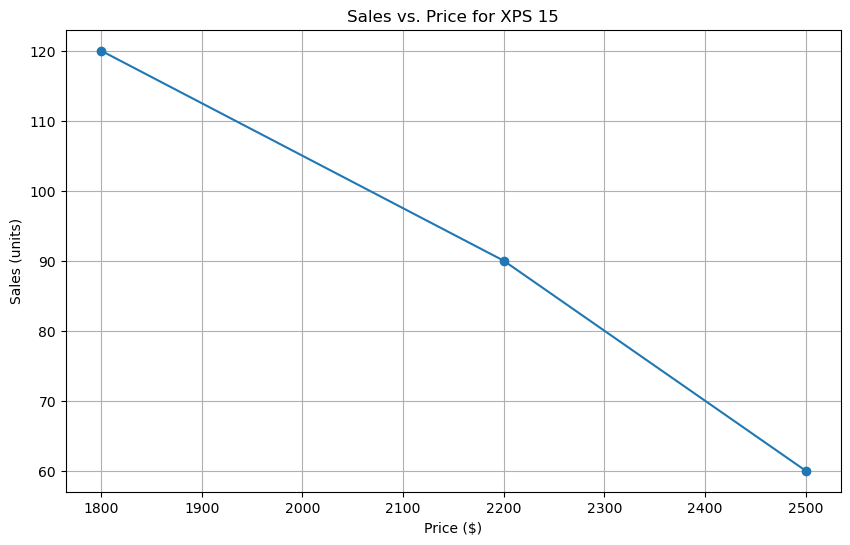

ANOVA Results:
F-statistic: nan, p-value: nan
There is no significant difference in sales between the different price points.


/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [17]:
data = {
    'Location': ['UCSD', 'Ohio State', 'Florida'],
    'Price': [1800, 2200, 2500],
    'Sales': [120, 90, 60]  # Hypothetical sales numbers
}

df = pd.DataFrame(data)

print("Descriptive Statistics:")
print(df.describe())

# plot 
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], df['Sales'], marker='o')
plt.title('Sales vs. Price for XPS 15')
plt.xlabel('Price ($)')
plt.ylabel('Sales (units)')
plt.grid(True)
plt.show()

# ANOVA test 
anova_results = stats.f_oneway(
    df[df['Price'] == 1800]['Sales'],
    df[df['Price'] == 2200]['Sales'],
    df[df['Price'] == 2500]['Sales']
)

print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic:.2f}, p-value: {anova_results.pvalue:.4f}")

# results
if anova_results.pvalue < 0.05:
    print("There is a significant difference in sales between the different price points.")
else:
    print("There is no significant difference in sales between the different price points.")


Question 5: Field data (25 points)

You are the Health and Beauty category manager at a large national convenience store retailer. Your category is driven by two main brand – a leading National Brand, henceforth labelled “NB” and a private label store brand, henceforth labelled “SB”. The marginal cost for the NB product is $4.00 and for the SB product is $2.50. (Note: full disclosure these are simulated data)
Your strategy and insights team divide the stores in the US into 6 regions – labelled A, B, C, D, E and F [e.g.,North, South, etc.] and collect weekly price and volume data for the NB and SB by region over the last two years (104 weeks). These data represent the aggregate units sold across all stores in a region and the price set in that region. The Figure below plots the price and sales for the NB product in region A. You want to analyze if the prices for the NB and SB products in this market.
Data description:
The data are in “allregion.csv”. This has 10 columns: Column 1: Week (an index for week #. 104 is most recent); Column 2 Region: is one of A-F to indicate the region; Columns 3 and 4: Sales_NB and Sales_SB (The total sales for the NB and SB products by week and region); Column 5 and 6: Price_NB and Price_SB (the price set in that region in that week); Column 7, 8, 9 and 10: logSales_NB, logSales_SB, logPrice_NB and logPrice_SB the natural log of columns 3, 4, 5 and 6 respectively.
Questions:
1.	What factors beyond impact demand? Provide chart(s) to justify your answer
a.	Do you think demand varies by region? For SB for NB?
b.	Do you think demand varies by week? For SB for NB?
c.	Is the demand for NB related to price of SB? Is the demand for SB related to price of NB?
2.	Run the following regression
logSales_NB = a + b* logPrice_NB + c* logPrice_SB + Region
a.	What is the own price elasticity of demand for NB? Explain the interpretation of the coefficient b in words
b.	How does the price of SB impact NB sales?
c.	What is the optimal price for NB?
3.	Run the following regression
logSales_SB = a + b* logPrice_SB + c* logPrice_NB + Region
a.	What is the own price elasticity of demand for SB? Explain the interpretation of the coefficient b in words
b.	How does the price of NB impact SB sales?
c.	What is the optimal price for SB?
4.	Compare your results in question 2 and question 3. How are the brands NB and SB different in their responsiveness to price?
Limit answers to 2 pages (maximum)


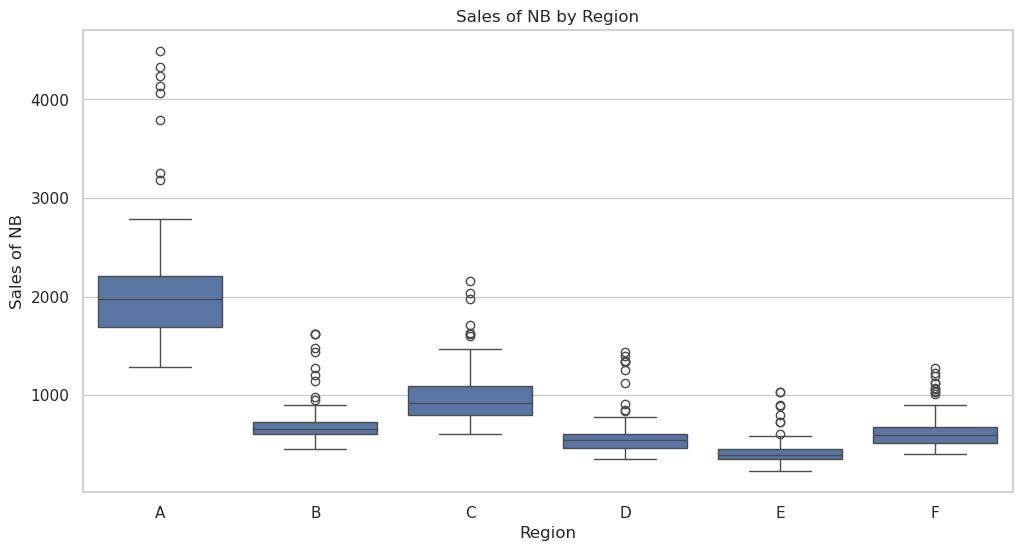

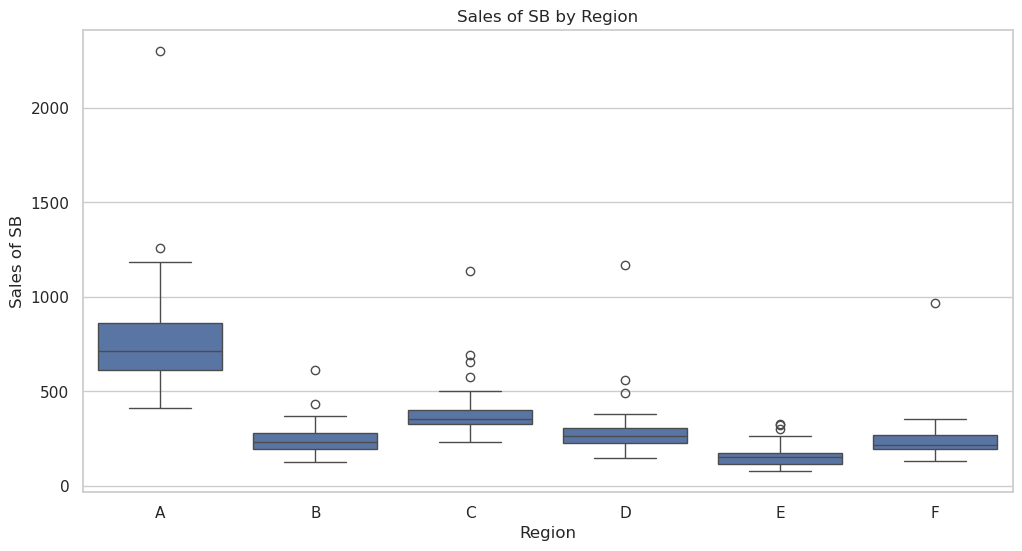

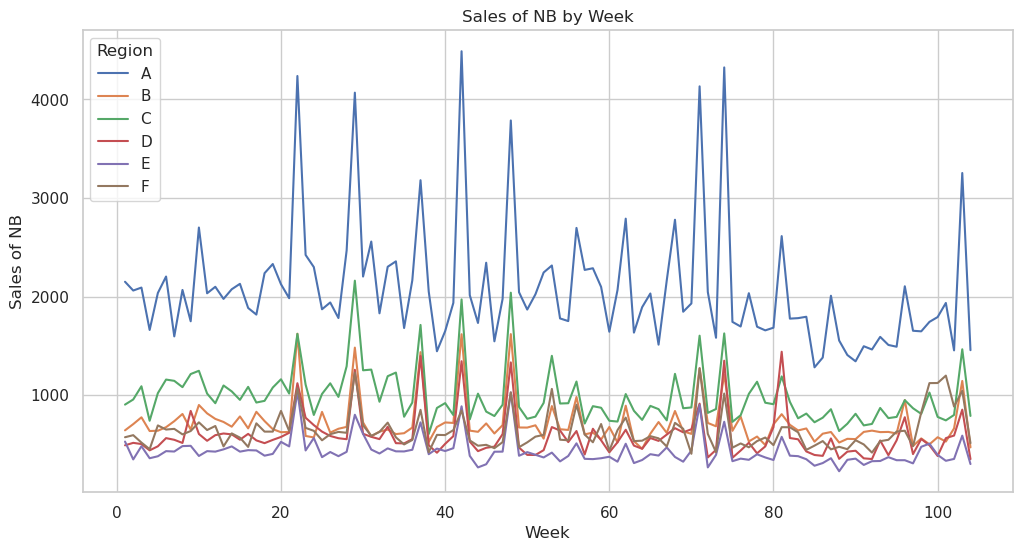

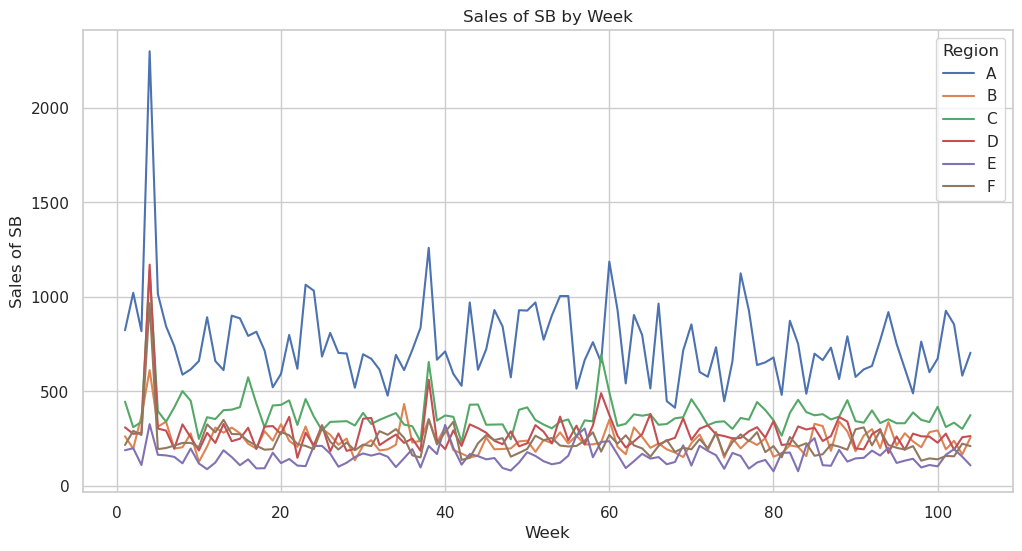

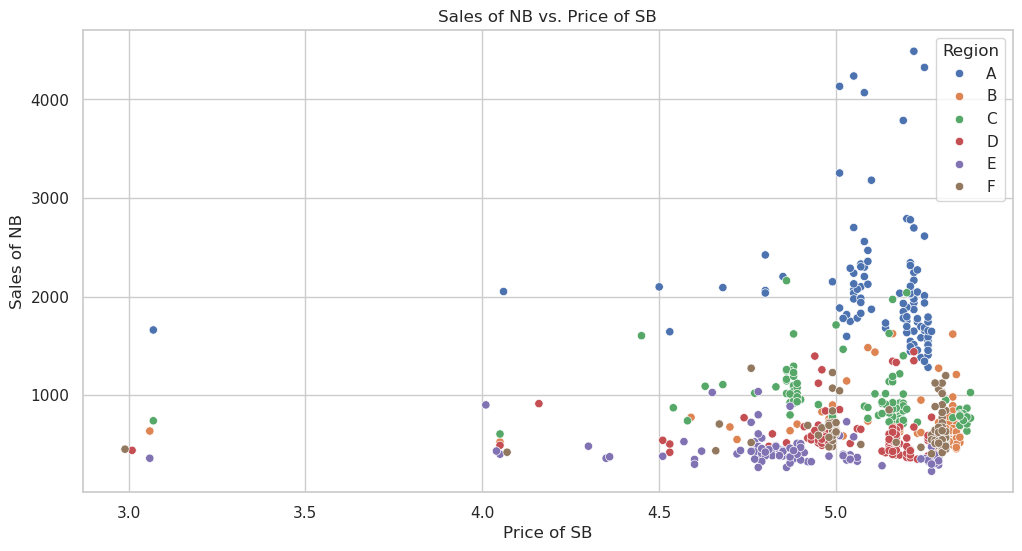

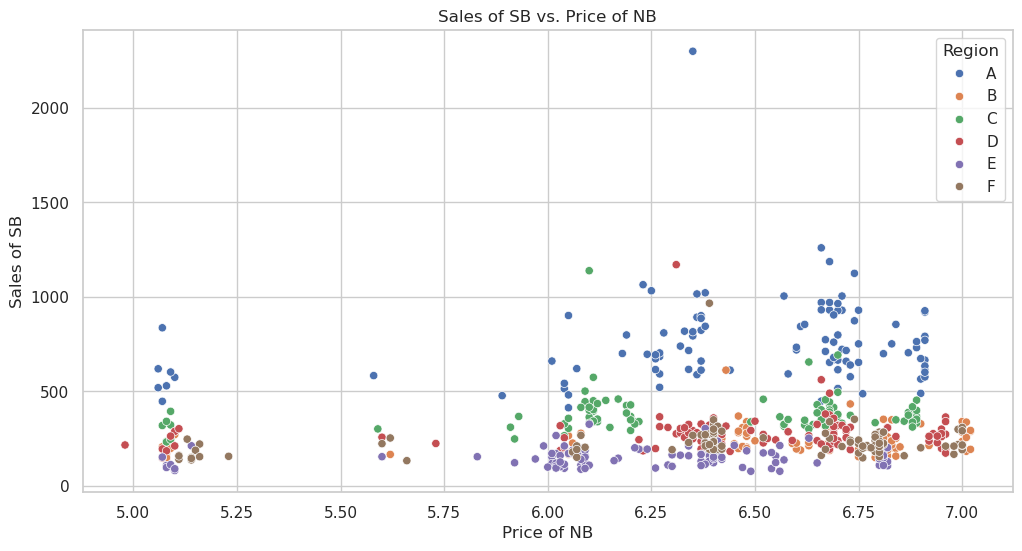

In [20]:

data = pd.read_csv("/home/jovyan/479/479pricinganalytics/Midterm /allregion.csv")

sns.set(style="whitegrid")

# demand by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales_NB', data=data)
plt.title('Sales of NB by Region')
plt.xlabel('Region')
plt.ylabel('Sales of NB')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales_SB', data=data)
plt.title('Sales of SB by Region')
plt.xlabel('Region')
plt.ylabel('Sales of SB')
plt.show()

# demand by week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales_NB', hue='Region', data=data)
plt.title('Sales of NB by Week')
plt.xlabel('Week')
plt.ylabel('Sales of NB')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales_SB', hue='Region', data=data)
plt.title('Sales of SB by Week')
plt.xlabel('Week')
plt.ylabel('Sales of SB')
plt.show()

# relationship between NB sales and SB price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price_SB', y='Sales_NB', hue='Region', data=data)
plt.title('Sales of NB vs. Price of SB')
plt.xlabel('Price of SB')
plt.ylabel('Sales of NB')
plt.show()

# relationship between SB sales and NB price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price_NB', y='Sales_SB', hue='Region', data=data)
plt.title('Sales of SB vs. Price of NB')
plt.xlabel('Price of NB')
plt.ylabel('Sales of SB')
plt.show()

In [21]:
# regression formula
formula_nb = 'logSales_NB ~ logPrice_NB + logPrice_SB + C(Region)'

# model fitting
model_nb = smf.ols(formula=formula_nb, data=data).fit()

# summary of the regression
print(model_nb.summary())

                            OLS Regression Results                            
Dep. Variable:            logSales_NB   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        21:48:21   Log-Likelihood:                 398.18
No. Observations:                 624   AIC:                            -780.4
Df Residuals:                     616   BIC:                            -744.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.6093      0.162     77.

In [22]:
#regression formula
formula_sb = 'logSales_SB ~ logPrice_SB + logPrice_NB + C(Region)'

# model fitting
model_sb = smf.ols(formula=formula_sb, data=data).fit()

print(model_sb.summary())

                            OLS Regression Results                            
Dep. Variable:            logSales_SB   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     583.1
Date:                Sun, 26 May 2024   Prob (F-statistic):          6.41e-267
Time:                        21:52:52   Log-Likelihood:                 108.78
No. Observations:                 624   AIC:                            -201.6
Df Residuals:                     616   BIC:                            -166.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.1308      0.257     31.

In [23]:
mc_nb = 4.00
mc_sb = 2.50
elasticity_nb = -3.0068
elasticity_sb = -2.2732

# Calculate the optimal prices
optimal_price_nb = mc_nb / (1 + (1 / elasticity_nb))
optimal_price_sb = mc_sb / (1 + (1 / elasticity_sb))

optimal_price_nb, optimal_price_sb

(5.993223041658362, 4.4635563933396165)

Question 7: Price discrimination (20 points)

Please answer Question 7.1 to Question 7.3 based on the information below
You are the pricing manager for sodas. Say there are two segments of consumers – Segment A (travelers)
and Segment B (at-home consumption). Assume the two segments are the same size, and the cost of
production is 0. You sell two kinds of beverages: Cans and Glass Bottles
With the following willingness to pay
Segment A:
Segment	Cans	Bottles
A	4	6
B	3	4

7.1 What is the optimal price for cans? How much revenue do you get for cans when you charge this price?
7.2 What is the optimal price for bottles? How much revenue do you get for bottles when you charge this price?
7.3 What are the optimal prices for both cans and bottles (price discrimination)? Is price discrimination profitable? 

In [25]:
willingness_to_pay = {
    'A': {'Cans': 4, 'Bottles': 6},
    'B': {'Cans': 3, 'Bottles': 4}
}

# segment size 
segment_size = 1

# optimal price for cans
price_cans_4 = willingness_to_pay['A']['Cans'] * segment_size
price_cans_3 = willingness_to_pay['B']['Cans'] * 2 * segment_size

optimal_price_cans = 3 if price_cans_3 > price_cans_4 else 4
revenue_cans = max(price_cans_4, price_cans_3)

# optimal price for bottles
price_bottles_6 = willingness_to_pay['A']['Bottles'] * segment_size
price_bottles_4 = willingness_to_pay['B']['Bottles'] * 2 * segment_size

optimal_price_bottles = 4 if price_bottles_4 > price_bottles_6 else 6
revenue_bottles = max(price_bottles_6, price_bottles_4)

# price discrimination
revenue_cans_discrimination = willingness_to_pay['A']['Cans'] * segment_size + willingness_to_pay['B']['Cans'] * segment_size
revenue_bottles_discrimination = willingness_to_pay['A']['Bottles'] * segment_size + willingness_to_pay['B']['Bottles'] * segment_size

total_revenue_discrimination = revenue_cans_discrimination + revenue_bottles_discrimination

# output results
print(f"Optimal price for cans: ${optimal_price_cans}, Revenue: ${revenue_cans}")
print(f"Optimal price for bottles: ${optimal_price_bottles}, Revenue: ${revenue_bottles}")
print(f"Price discrimination revenue for cans: ${revenue_cans_discrimination}")
print(f"Price discrimination revenue for bottles: ${revenue_bottles_discrimination}")
print(f"Total revenue with price discrimination: ${total_revenue_discrimination}")

Optimal price for cans: $3, Revenue: $6
Optimal price for bottles: $4, Revenue: $8
Price discrimination revenue for cans: $7
Price discrimination revenue for bottles: $10
Total revenue with price discrimination: $17
